In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
df.sample(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
302,ham,Oh and by the way you do have more food in you...,NaN,NaN,NaN
4844,ham,Missing you too.pray inshah allah,NaN,NaN,NaN
322,ham,cud u tell ppl im gona b a bit l8 cos 2 buses ...,NaN,NaN,NaN
464,ham,Ok i am on the way to railway,NaN,NaN,NaN
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ...",NaN,NaN,NaN
1040,ham,Today am going to college so am not able to at...,NaN,NaN,NaN
3834,ham,I'm thinking that chennai forgot to come for a...,NaN,NaN,NaN
971,ham,"Haha awesome, omw back now then",NaN,NaN,NaN
4741,ham,Ya very nice. . .be ready on thursday,NaN,NaN,NaN
2161,ham,Is she replying. Has boye changed his phone nu...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
2588,ham,My superior telling that friday is leave for a...
4813,ham,Ummmmmaah Many many happy returns of d day my ...
2563,ham,K..k..i'm also fine:)when will you complete th...
1679,ham,"Today is \song dedicated day..\"" Which song wi..."
3682,ham,When did i use soc... I use it only at home......


In [9]:
# renaming the columns 
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
# converting text target into numerical form
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicated values
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2. EDA

In [17]:
df['target'].value_counts()
# 0 -> not spam
# 1 -> spam

target
0    4516
1     653
Name: count, dtype: int64

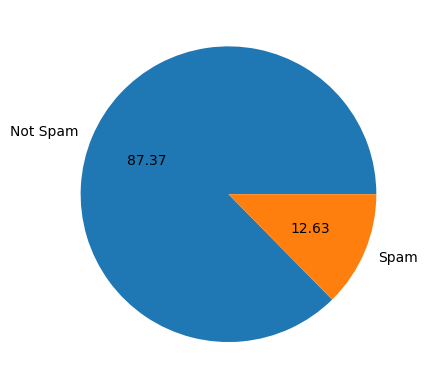

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['Not Spam', 'Spam'], autopct = "%0.2f")
plt.show()

In [19]:
# data is imbalanced

In [20]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import string


[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bgaut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# number of characters
df['num_of_characters'] = df['text'].apply(len)
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# number of words
df['num_of_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# number of sentences
df['num_of_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
# not spam
df[df['target'] == 0] [['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# spam 
df[df['target'] == 1] [['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

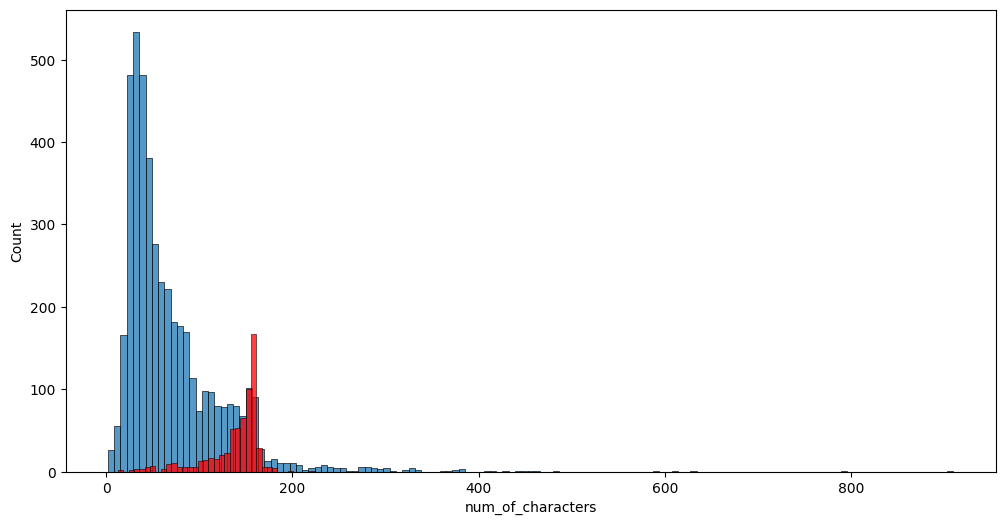

In [26]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0] ['num_of_characters'])
sns.histplot(df[df['target'] == 1] ['num_of_characters'], color = 'red')

C:\Users\bgaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


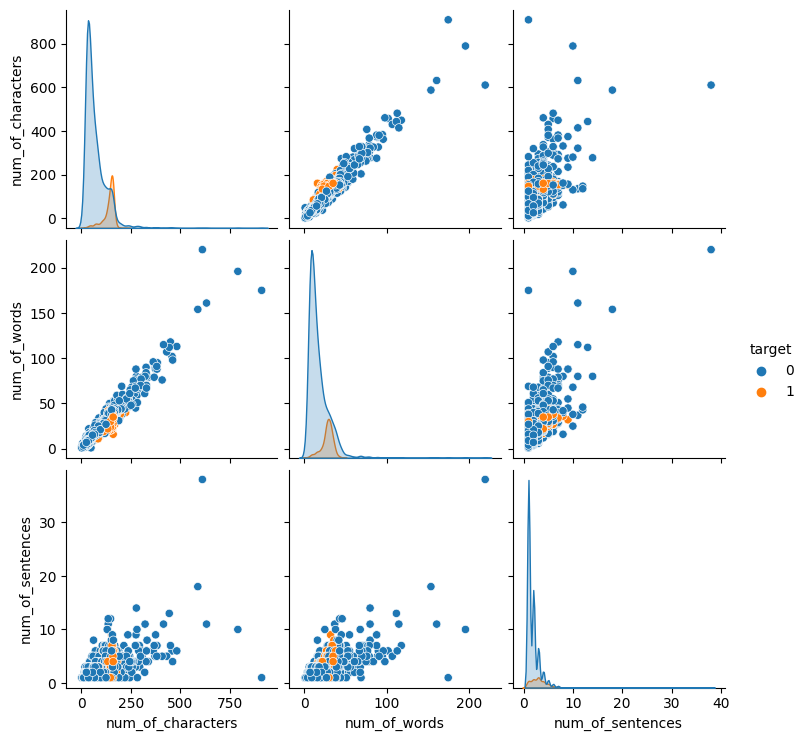

In [27]:
sns.pairplot(df, hue = 'target')

In [28]:
new = df.drop(columns = ['text']).corr()

<Axes: >

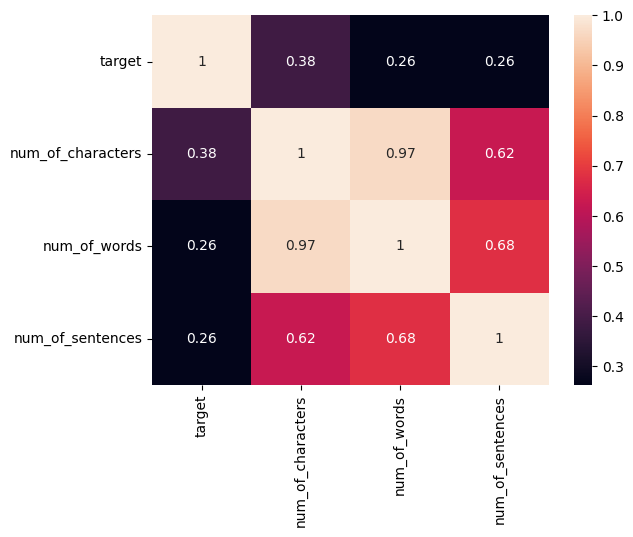

In [29]:
sns.heatmap(new, annot = True)

## 3. Data Preprocessing
1.Lower case2.
Tokenization3.
Removing special character4.s
Removing stop words and punctuati5.on
Stemming

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bgaut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
spam_corpus = []
for msg in df[df['target'] == 1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

9939

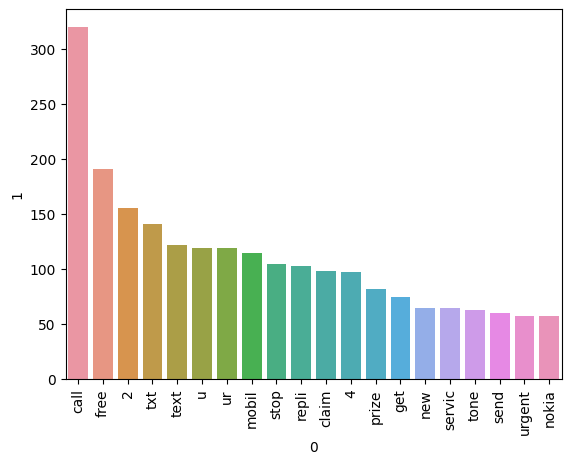

In [40]:
from collections import Counter
zero = pd.DataFrame(Counter(spam_corpus).most_common(20))[0]
one =  pd.DataFrame(Counter(spam_corpus).most_common(20))[1]
sns.barplot(x = zero, y = one, data = df)
plt.xticks(rotation = 'vertical')
plt.show()

In [41]:
not_spam_corpus = []
for msg in df[df['target'] == 0] ['transformed_text'].to_list():
    for word in msg.split():
        not_spam_corpus.append(word)

In [42]:
len(not_spam_corpus)

35404

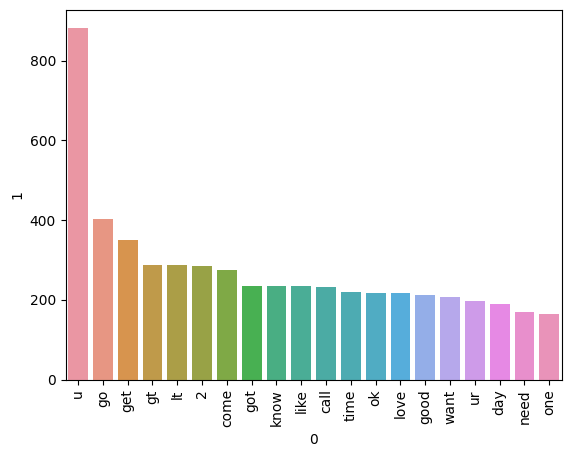

In [45]:
zero = pd.DataFrame(Counter(not_spam_corpus).most_common(20))[0]
one = pd.DataFrame(Counter(not_spam_corpus).most_common(20))[1]
sns.barplot(x = zero, y = one, data = df)
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [50]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(5169, 3000)

In [52]:
Y = df['target'].values

In [53]:
Y.shape

(5169,)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [57]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [56]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
gnb = GaussianNB()
mnb = MultinomialNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

clfs = {
    'SVC' : svc,
    'NB' : gnb,
    'MNB' : mnb,
    'KN' : knc,
    'RF' : rfc,
    'XGB' : xgb
}

In [58]:
def train_classifiers(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    return accuracy, precision

In [59]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifiers(clf, X_train, Y_train, X_test, Y_test)
    
    print("For ", name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  XGB
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [60]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 
                             'Accuracy' : accuracy_scores,
                             'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [61]:
performance_df

,Algorithm,Accuracy,Precision
2,MNB,0.970986,1.000000
3,KN,0.905222,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
5,XGB,0.967118,0.926230
1,NB,0.869439,0.506849


In [62]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))